In [1]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json from your local machine


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"panchadip","key":"33a5993233e61658bf4707e01c184f6b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permissions


# Downloading the Dataset

In [4]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 427M/427M [00:02<00:00, 77.5MB/s]
100% 427M/427M [00:02<00:00, 154MB/s] 


In [5]:
import zipfile

with zipfile.ZipFile("/content/waste-classification-data.zip","r") as zip_ref:
    zip_ref.extractall("./dataset")


In [ ]:
# Unzipping the dataset
!unzip -o /content/waste-classification-data.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: /content/dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflati

In [6]:
import os
print("Files in dataset folder:", os.listdir("./dataset"))

Files in dataset folder: ['dataset', 'DATASET']


=== Train Image Counts per Class ===
R: 9999
O: 12565

=== Test Image Counts per Class ===
R: 1112
O: 1401


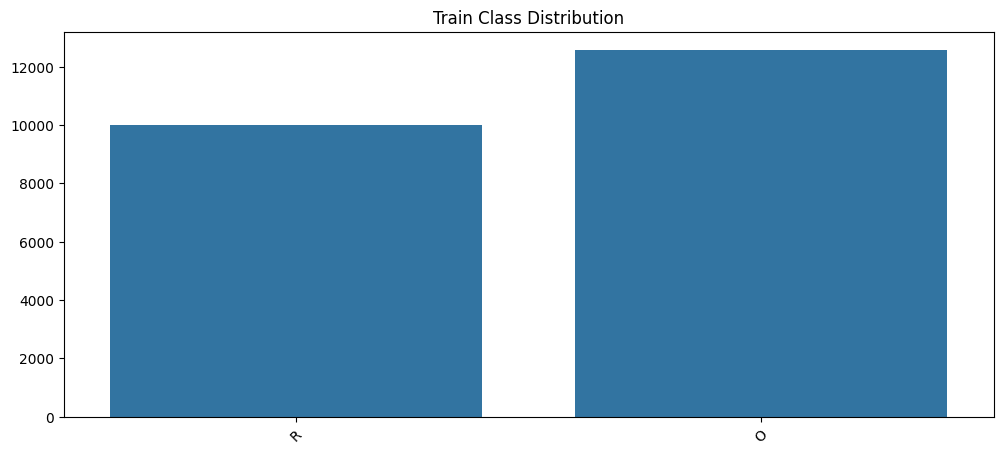

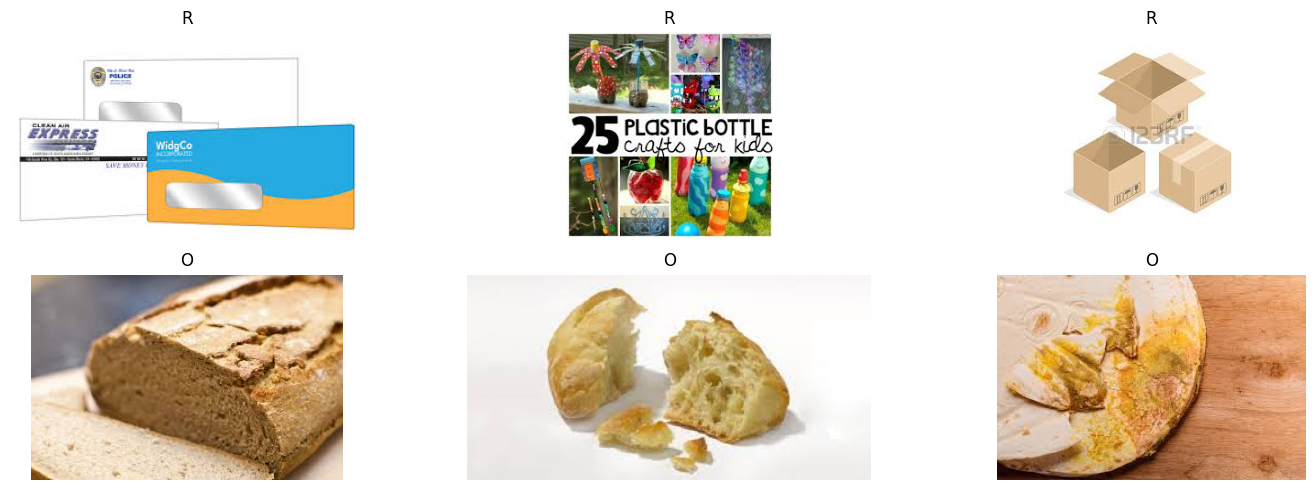

Number of images: 22564
Example image size: (295, 171)
Min size: (51, 69), Max size: (600, 383)
Mean size: (np.float64(252.31687644034744), np.float64(203.74711930508775))


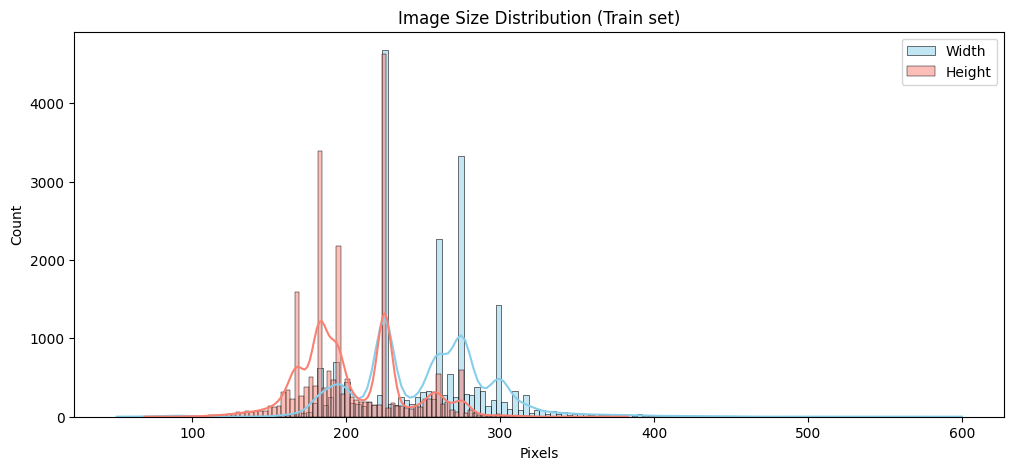

In [8]:
# =====================================================
# FULL AUTOMATED EDA FOR IMAGE DATASET (TRAIN + TEST)
# =====================================================
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------- Paths -----------------
train_path = "./dataset/DATASET/TRAIN"
test_path = "./dataset/DATASET/TEST"

# ----------------- Function to count images per class -----------------
def count_images(path):
    classes = os.listdir(path)
    class_counts = {}
    for cls in classes:
        cls_path = os.path.join(path, cls)
        class_counts[cls] = len(os.listdir(cls_path))
    return class_counts

train_counts = count_images(train_path)
test_counts = count_images(test_path)

print("=== Train Image Counts per Class ===")
for k,v in train_counts.items():
    print(f"{k}: {v}")
print("\n=== Test Image Counts per Class ===")
for k,v in test_counts.items():
    print(f"{k}: {v}")

# ----------------- Bar plot of class distribution -----------------
plt.figure(figsize=(12,5))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Train Class Distribution")
plt.xticks(rotation=45)
plt.show()

# ----------------- Display sample images from each class -----------------
def show_samples(path, num_samples=3):
    classes = os.listdir(path)
    plt.figure(figsize=(15, 5))
    i = 1
    for cls in classes:
        cls_path = os.path.join(path, cls)
        images = os.listdir(cls_path)[:num_samples]
        for img_name in images:
            img_path = os.path.join(cls_path, img_name)
            img = Image.open(img_path)
            plt.subplot(len(classes), num_samples, i)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            i += 1
    plt.tight_layout()
    plt.show()

show_samples(train_path)

# ----------------- Image sizes -----------------
def get_image_sizes(path):
    classes = os.listdir(path)
    sizes = []
    for cls in classes:
        cls_path = os.path.join(path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            img = Image.open(img_path)
            sizes.append(img.size)
    return sizes

sizes = get_image_sizes(train_path)
widths, heights = zip(*sizes)

print(f"Number of images: {len(sizes)}")
print(f"Example image size: {sizes[0]}")
print(f"Min size: {(min(widths), min(heights))}, Max size: {(max(widths), max(heights))}")
print(f"Mean size: {(np.mean(widths), np.mean(heights))}")

# ----------------- Plot image size distribution -----------------
plt.figure(figsize=(12,5))
sns.histplot(widths, color='skyblue', label='Width', kde=True)
sns.histplot(heights, color='salmon', label='Height', kde=True)
plt.title("Image Size Distribution (Train set)")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.legend()
plt.show()

Installing torch>=1.10.0 ...
Installing Pillow ...
Installing scikit-learn ...
Installing opencv-python ...
Installing grad-cam ...
Device: cuda
=== Train Image Counts per Class ===
O: 12565
R: 9999

=== Test Image Counts per Class ===
O: 1401
R: 1112


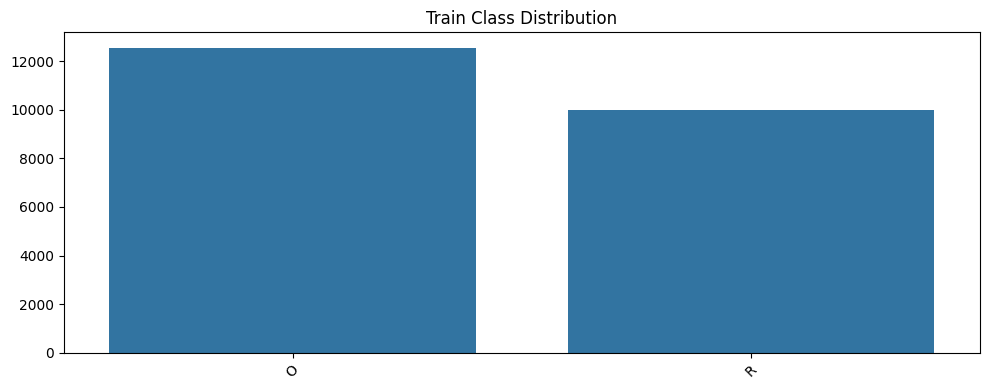

Classes: ['O', 'R']
Train samples: 22564, Val samples: 2513
Class weights: [0.89789097 1.12831283]

Training model: resnet18
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s]


Epoch 1/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 1: train_loss=0.2773 train_acc=0.8919 val_loss=0.2330 val_acc=0.9045


Epoch 2/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 2: train_loss=0.2526 train_acc=0.9012 val_loss=0.1654 val_acc=0.9419


Epoch 3/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 3: train_loss=0.2246 train_acc=0.9133 val_loss=0.1943 val_acc=0.9343


Epoch 4/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 4: train_loss=0.2225 train_acc=0.9148 val_loss=0.2323 val_acc=0.9160


Epoch 5/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 5: train_loss=0.2149 train_acc=0.9170 val_loss=0.1777 val_acc=0.9355


Epoch 6/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 6: train_loss=0.1811 train_acc=0.9294 val_loss=0.1594 val_acc=0.9451

Training model: resnet34
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 191MB/s]


Epoch 1/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 1: train_loss=0.2916 train_acc=0.8858 val_loss=0.2196 val_acc=0.9192


Epoch 2/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 2: train_loss=0.2551 train_acc=0.8994 val_loss=0.1596 val_acc=0.9415


Epoch 3/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 3: train_loss=0.2401 train_acc=0.9059 val_loss=0.1756 val_acc=0.9347


Epoch 4/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 4: train_loss=0.2211 train_acc=0.9134 val_loss=0.2337 val_acc=0.9045


Epoch 5/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 5: train_loss=0.2162 train_acc=0.9149 val_loss=0.1718 val_acc=0.9375


Epoch 6/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 6: train_loss=0.1845 train_acc=0.9271 val_loss=0.2240 val_acc=0.9240

Training model: mobilenet_v2
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 125MB/s]


Epoch 1/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 1: train_loss=0.2609 train_acc=0.8974 val_loss=0.2689 val_acc=0.9085


Epoch 2/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 2: train_loss=0.2247 train_acc=0.9122 val_loss=0.2271 val_acc=0.9244


Epoch 3/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 3: train_loss=0.2162 train_acc=0.9168 val_loss=0.1678 val_acc=0.9403


Epoch 4/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 4: train_loss=0.2014 train_acc=0.9215 val_loss=0.1465 val_acc=0.9427


Epoch 5/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 5: train_loss=0.1981 train_acc=0.9245 val_loss=0.2944 val_acc=0.8957


Epoch 6/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 6: train_loss=0.1922 train_acc=0.9239 val_loss=0.1420 val_acc=0.9519


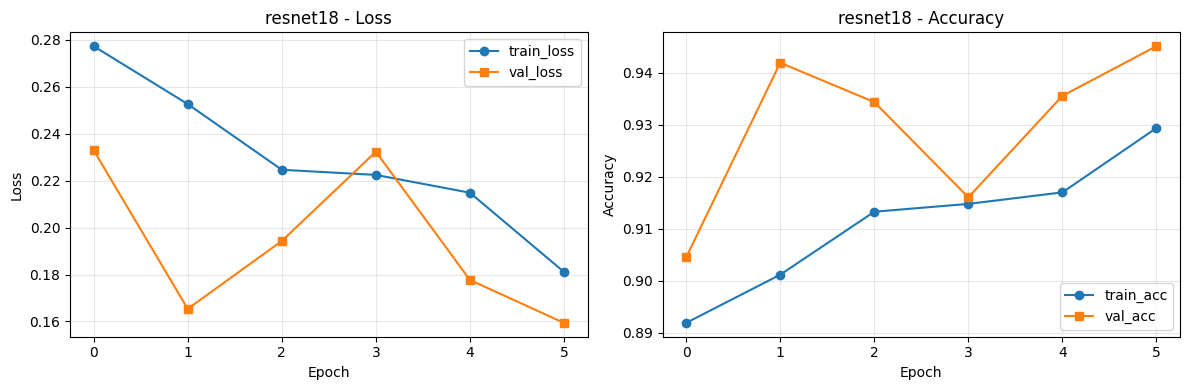

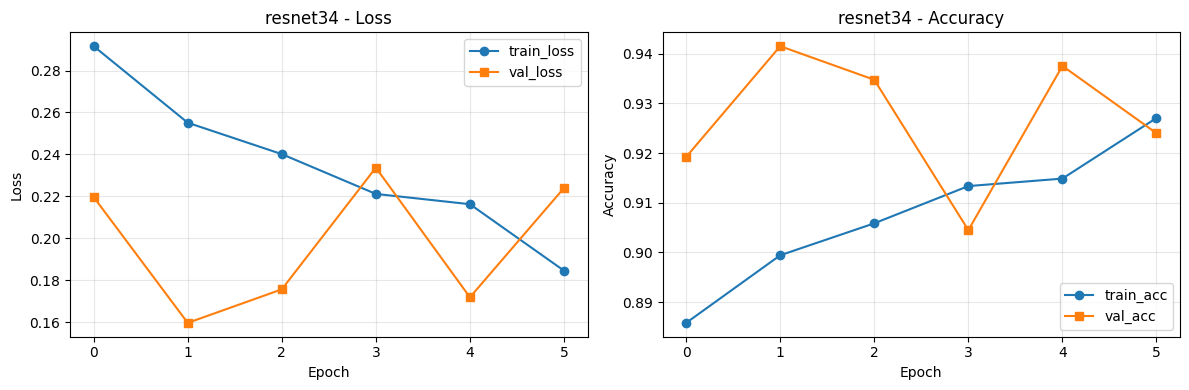

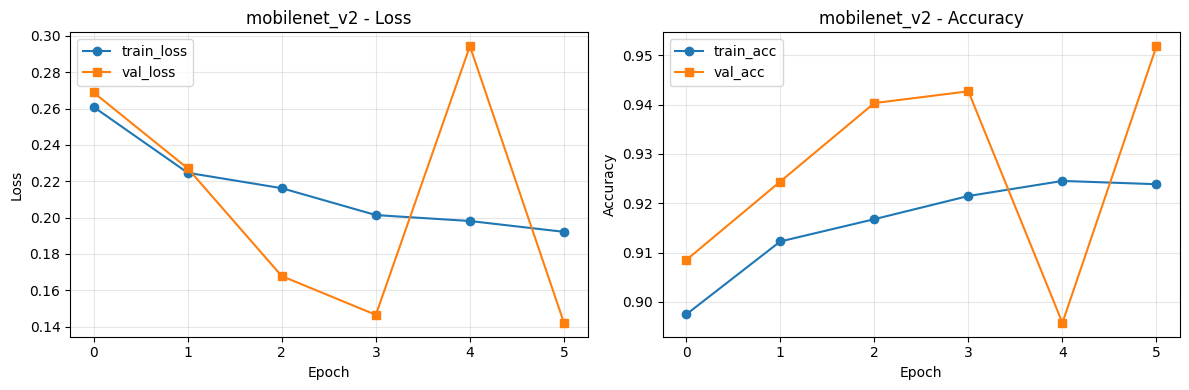


Evaluating: resnet18
              precision    recall  f1-score   support

           O       0.95      0.95      0.95      1401
           R       0.93      0.94      0.94      1112

    accuracy                           0.95      2513
   macro avg       0.94      0.94      0.94      2513
weighted avg       0.95      0.95      0.95      2513



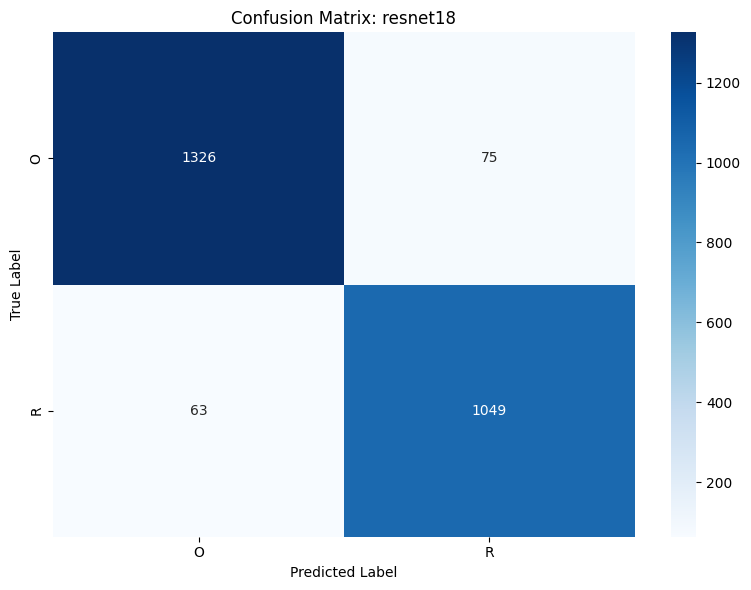


Evaluating: resnet34
              precision    recall  f1-score   support

           O       0.95      0.94      0.95      1401
           R       0.93      0.94      0.93      1112

    accuracy                           0.94      2513
   macro avg       0.94      0.94      0.94      2513
weighted avg       0.94      0.94      0.94      2513



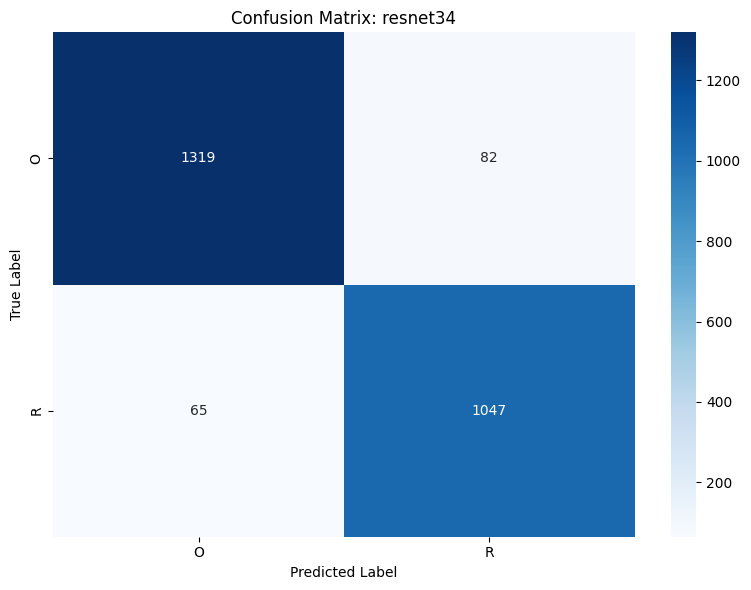


Evaluating: mobilenet_v2
              precision    recall  f1-score   support

           O       0.94      0.98      0.96      1401
           R       0.97      0.92      0.94      1112

    accuracy                           0.95      2513
   macro avg       0.95      0.95      0.95      2513
weighted avg       0.95      0.95      0.95      2513



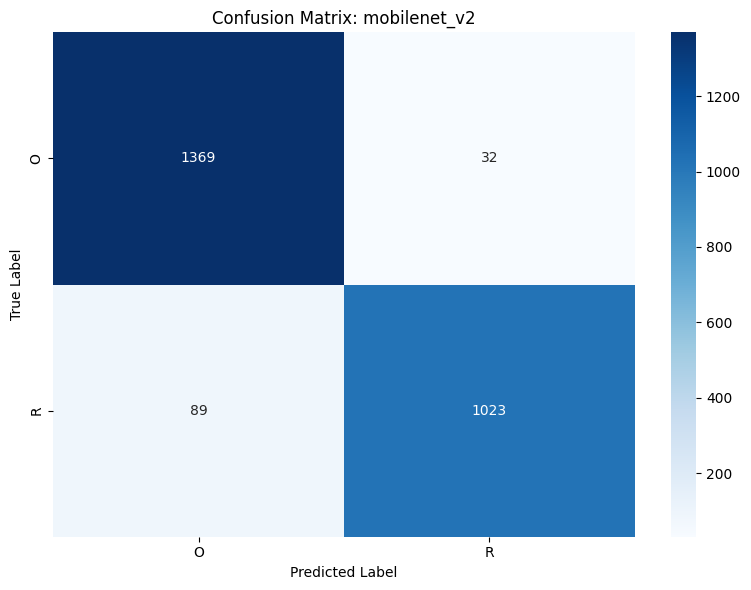


NOVEL STACKED WEIGHTED ENSEMBLE

--- Simple Average Ensemble ---
              precision    recall  f1-score   support

           O       0.96      0.97      0.96      1401
           R       0.96      0.95      0.96      1112

    accuracy                           0.96      2513
   macro avg       0.96      0.96      0.96      2513
weighted avg       0.96      0.96      0.96      2513


--- Weighted Average Ensemble ---
Model weights: {'resnet18': np.float64(0.33295948408804155), 'resnet34': np.float64(0.33169774288518156), 'mobilenet_v2': np.float64(0.33534277302677695)}
              precision    recall  f1-score   support

           O       0.96      0.97      0.96      1401
           R       0.96      0.95      0.96      1112

    accuracy                           0.96      2513
   macro avg       0.96      0.96      0.96      2513
weighted avg       0.96      0.96      0.96      2513


--- Stacked Meta-Learner Ensemble (NOVEL) ---
              precision    recall  f1-score

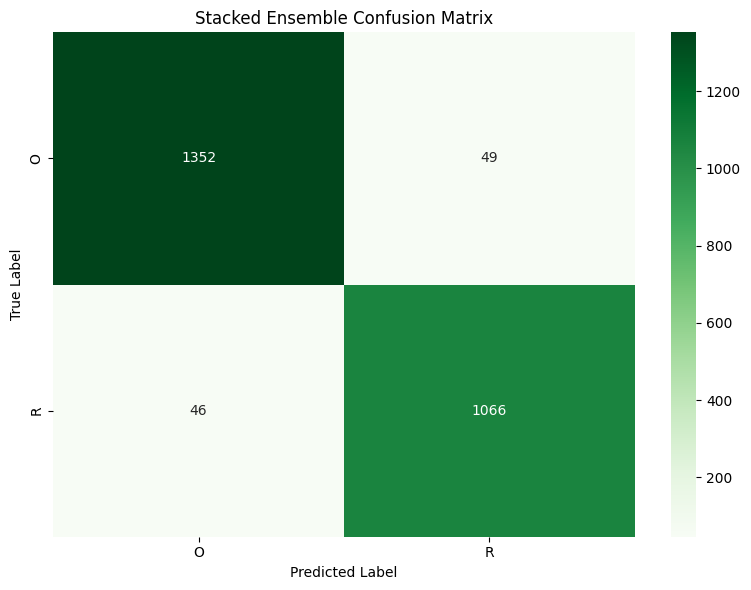


EXPLAINABLE AI (XAI) ANALYSIS

Sample Analysis:
True Label: O
Predicted Label: O (Confidence: 0.934)

1. Generating Grad-CAM++ visualization...


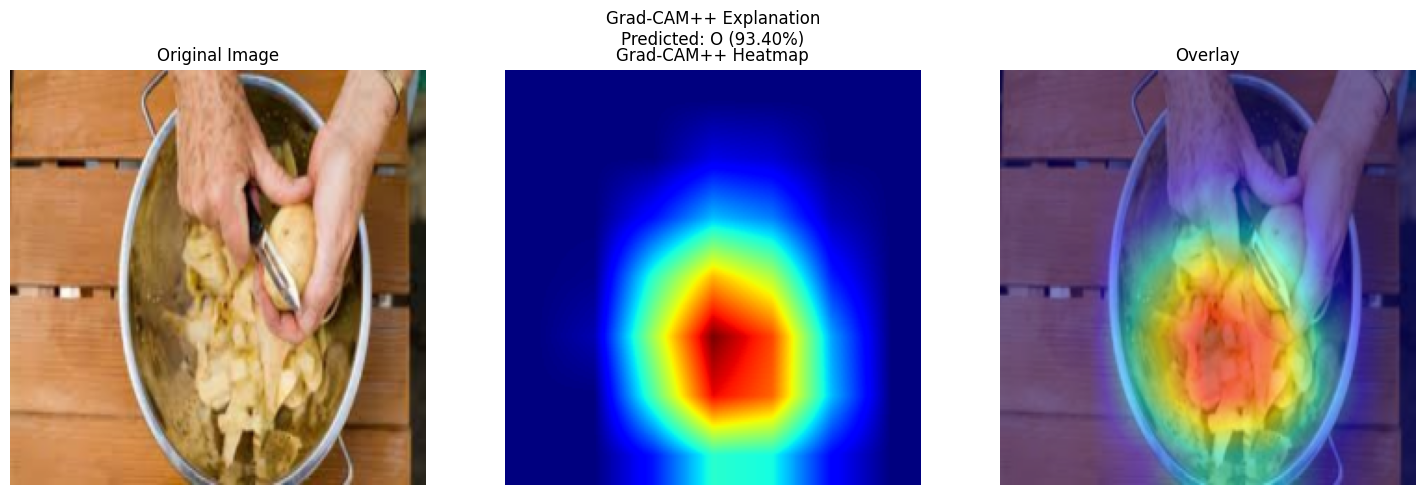


2. Computing Integrated Gradients...


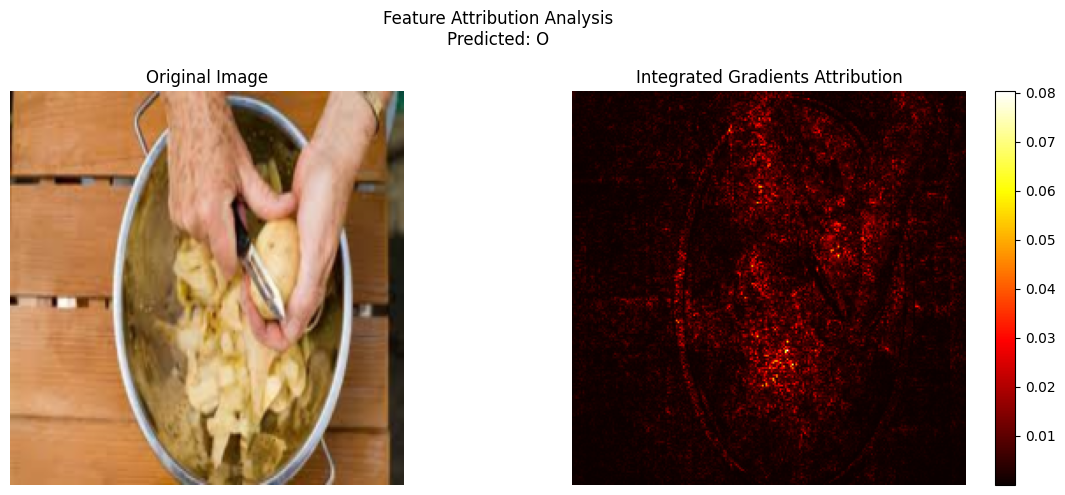


3. Generating LIME explanation...


  0%|          | 0/500 [00:00<?, ?it/s]

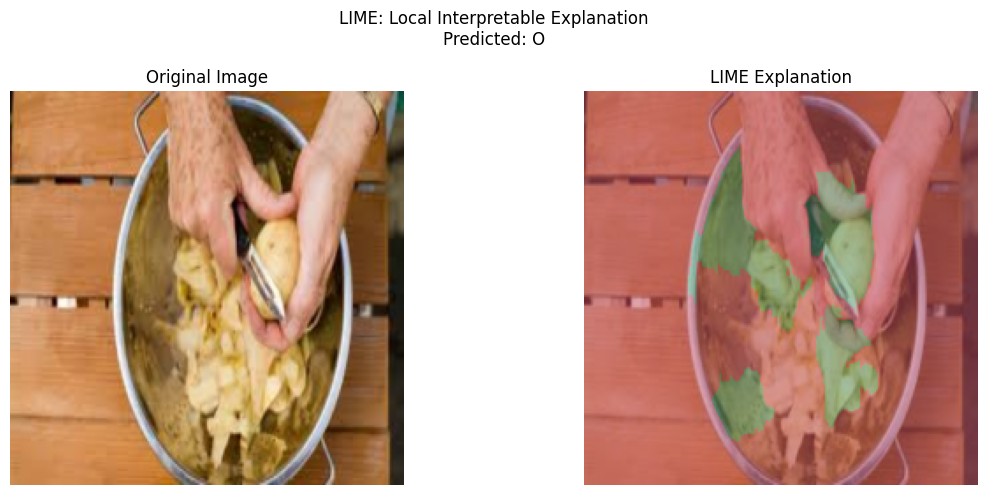


4. Computing Saliency Maps...


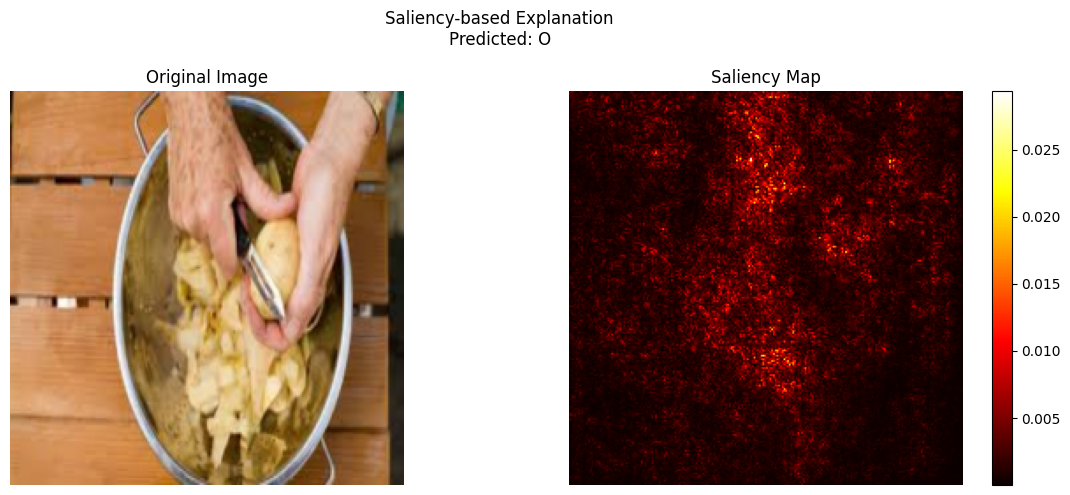


ABLATION STUDIES

Baseline Accuracy: 0.9451

1. Ablation: Training without data augmentation...


Epoch 1/3:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 1: train_loss=0.2128 train_acc=0.9205 val_loss=0.2564 val_acc=0.9057


Epoch 2/3:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 2: train_loss=0.1547 train_acc=0.9423 val_loss=0.2465 val_acc=0.9113


Epoch 3/3:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 3: train_loss=0.1229 train_acc=0.9547 val_loss=0.2851 val_acc=0.9196
   Accuracy without augmentation: 0.9196 (Change: -0.0255)

2. Ablation: Training without class weights...


Epoch 1/3:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 1: train_loss=0.2803 train_acc=0.8908 val_loss=0.2576 val_acc=0.8957


Epoch 2/3:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 2: train_loss=0.2412 train_acc=0.9066 val_loss=0.2048 val_acc=0.9188


Epoch 3/3:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 3: train_loss=0.2304 train_acc=0.9114 val_loss=0.2033 val_acc=0.9200
   Accuracy without class weights: 0.9200 (Change: -0.0251)

3. Ablation: Training from scratch (no transfer learning)...


Epoch 1/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 1: train_loss=0.4879 train_acc=0.7786 val_loss=0.5083 val_acc=0.7513


Epoch 2/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 2: train_loss=0.4427 train_acc=0.8054 val_loss=0.3967 val_acc=0.8229


Epoch 3/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 3: train_loss=0.4052 train_acc=0.8272 val_loss=0.4599 val_acc=0.8006


Epoch 4/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 4: train_loss=0.3848 train_acc=0.8372 val_loss=0.4124 val_acc=0.8269


Epoch 5/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 5: train_loss=0.3761 train_acc=0.8397 val_loss=0.2697 val_acc=0.8949


Epoch 6/6:   0%|          | 0/706 [00:00<?, ?it/s]

Epoch 6: train_loss=0.3631 train_acc=0.8461 val_loss=0.3435 val_acc=0.8524
   Accuracy without transfer learning: 0.8949 (Change: -0.0501)


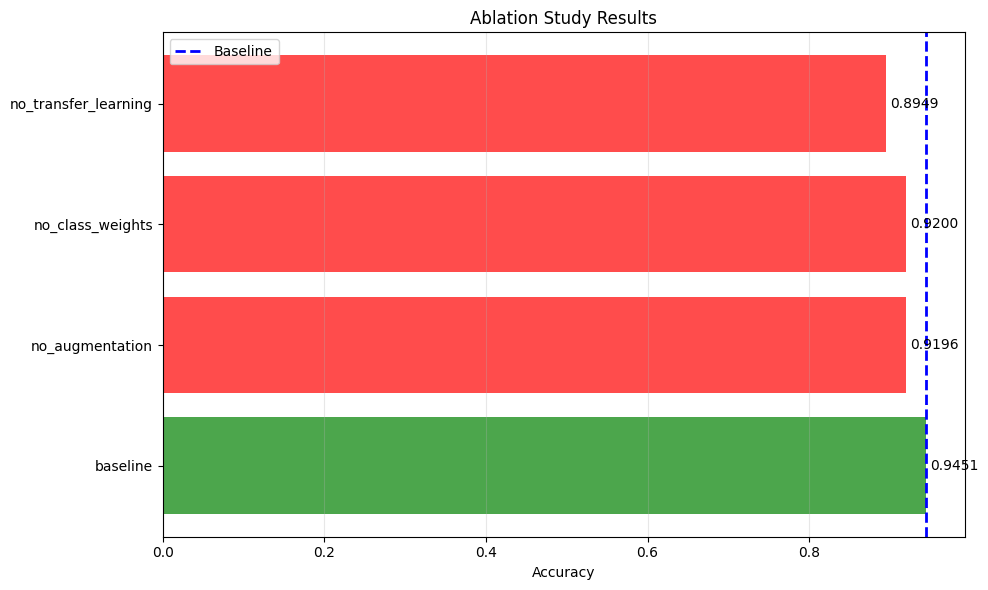


Ablation results saved to ablation_results.csv

ANALYSIS COMPLETE

All results saved to: ./outputs

Generated outputs:
  - Model checkpoints (.pth)
  - Training curves (.png)
  - Confusion matrices (.png)
  - Ensemble results (.pkl)
  - XAI visualizations (.png)
  - Ablation study results (.csv, .png)
  - Summary report (.txt)


In [11]:
# =========================================================
# COMPLETE EDA + TRAINING + NOVEL ENSEMBLE + XAI + ABLATIONS
# Industry-ready production code with all fixes
# =========================================================

import os, sys, time, math, random, traceback
from pathlib import Path
import subprocess
import warnings
warnings.filterwarnings("ignore")
random_seed = 42

def safe_install(pkg):
    try:
        __import__(pkg.split('==')[0].replace('-','_'))
    except Exception:
        print(f"Installing {pkg} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])

# Core packages
for pkg in ["torch>=1.10.0", "torchvision", "tqdm", "matplotlib", "numpy", "pandas",
            "Pillow", "albumentations", "scikit-learn", "seaborn", "opencv-python"]:
    safe_install(pkg)

# XAI packages
for pkg in ["grad-cam", "lime", "captum"]:
    safe_install(pkg)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
import albumentations as A
from albumentations.pytorch import ToTensorV2

# XAI imports
try:
    from pytorch_grad_cam import GradCAM, GradCAMPlusPlus
    from pytorch_grad_cam.utils.image import show_cam_on_image
    from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
    from captum.attr import IntegratedGradients, Saliency, GuidedGradCam
    from lime import lime_image
    from lime.wrappers.scikit_image import SegmentationAlgorithm
    xai_available = True
except Exception as e:
    print(f"XAI packages error: {e}")
    xai_available = False

# Configuration
train_path = "./dataset/DATASET/TRAIN"
test_path = "./dataset/DATASET/TEST"
OUTPUT_DIR = "./outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed(random_seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# =============================================================================
# UTILITY FUNCTIONS
# =============================================================================
def list_subdirs(path):
    return [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

def count_images(path):
    if not os.path.exists(path):
        return {}
    classes = list_subdirs(path)
    class_counts = {}
    for cls in sorted(classes):
        cls_path = os.path.join(path, cls)
        try:
            items = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
            class_counts[cls] = len(items)
        except Exception:
            class_counts[cls] = 0
    return class_counts

# =============================================================================
# EDA
# =============================================================================
train_counts = count_images(train_path)
test_counts = count_images(test_path) if os.path.exists(test_path) else {}

print("=== Train Image Counts per Class ===")
for k, v in train_counts.items():
    print(f"{k}: {v}")

if test_counts:
    print("\n=== Test Image Counts per Class ===")
    for k, v in test_counts.items():
        print(f"{k}: {v}")

plt.figure(figsize=(10, 4))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Train Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =============================================================================
# DATASET
# =============================================================================
class RobustImageDataset(Dataset):
    def __init__(self, root_dir, classes=None, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        if classes is None:
            classes = sorted(list_subdirs(root_dir))
        self.class_to_idx = {c: i for i, c in enumerate(classes)}
        for c in classes:
            folder = os.path.join(root_dir, c)
            if not os.path.isdir(folder):
                continue
            for f in os.listdir(folder):
                fp = os.path.join(folder, f)
                if os.path.isfile(fp):
                    self.samples.append((fp, self.class_to_idx[c]))
        if len(self.samples) == 0:
            raise RuntimeError(f"No samples found in {root_dir}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        try:
            img = Image.open(path).convert("RGB")
        except Exception:
            img = Image.new("RGB", (224, 224), (0, 0, 0))
        if self.transform:
            try:
                if isinstance(self.transform, A.Compose):
                    img = self.transform(image=np.array(img))['image']
                else:
                    img = self.transform(img)
            except Exception:
                img = transforms.ToTensor()(img)
        return img, label

# Transforms
img_size = 224
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(img_size),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.02),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataloaders
classes = sorted(list_subdirs(train_path))
batch_size = 32
num_workers = 2

train_ds = RobustImageDataset(train_path, classes=classes, transform=train_transforms)
val_ds = RobustImageDataset(test_path, classes=classes, transform=val_transforms) if os.path.exists(test_path) else None

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers) if val_ds else None

print(f"Classes: {classes}")
print(f"Train samples: {len(train_ds)}, Val samples: {len(val_ds) if val_ds else 0}")

# =============================================================================
# MODEL BUILDER
# =============================================================================
def get_model(name="resnet18", num_classes=None, pretrained=True):
    if num_classes is None:
        num_classes = len(classes)
    name = name.lower()

    if name == "resnet18":
        model = models.resnet18(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == "resnet34":
        model = models.resnet34(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == "resnet50":
        model = models.resnet50(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == "efficientnet_b0":
        model = models.efficientnet_b0(pretrained=pretrained)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif name == "mobilenet_v2":
        model = models.mobilenet_v2(pretrained=pretrained)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError(f"Unknown model: {name}")

    return model.to(device)

# =============================================================================
# TRAINING
# =============================================================================
def train_one_fold(model, train_loader, val_loader=None, epochs=6, lr=3e-4,
                   weight_decay=1e-4, output_path=None, use_amp=True, class_weights=None):
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)

    if class_weights is not None:
        criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32).to(device))
    else:
        criterion = nn.CrossEntropyLoss()

    scaler = torch.cuda.amp.GradScaler(enabled=(use_amp and torch.cuda.is_available()))
    best_val = -1
    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for imgs, labels in pbar:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.cuda.amp.autocast(enabled=(use_amp and torch.cuda.is_available())):
                outputs = model(imgs)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            preds = outputs.argmax(dim=1)
            running_loss += loss.item() * imgs.size(0)
            correct += (preds == labels).sum().item()
            total += imgs.size(0)
            pbar.set_postfix({"loss": running_loss/total, "acc": correct/total})

        train_loss = running_loss / total
        train_acc = correct / total
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)

        if val_loader is not None:
            model.eval()
            vloss = 0.0
            vcorrect = 0
            vtotal = 0

            with torch.no_grad():
                for vimgs, vlabels in val_loader:
                    vimgs, vlabels = vimgs.to(device), vlabels.to(device)
                    outputs = model(vimgs)
                    loss = criterion(outputs, vlabels)
                    vloss += loss.item() * vimgs.size(0)
                    preds = outputs.argmax(dim=1)
                    vcorrect += (preds == vlabels).sum().item()
                    vtotal += vimgs.size(0)

            val_loss = vloss / vtotal
            val_acc = vcorrect / vtotal
            history["val_loss"].append(val_loss)
            history["val_acc"].append(val_acc)
            scheduler.step(val_loss)

            print(f"Epoch {epoch+1}: train_loss={train_loss:.4f} train_acc={train_acc:.4f} "
                  f"val_loss={val_loss:.4f} val_acc={val_acc:.4f}")

            if val_acc > best_val:
                best_val = val_acc
                if output_path:
                    torch.save(model.state_dict(), output_path)
        else:
            print(f"Epoch {epoch+1}: train_loss={train_loss:.4f} train_acc={train_acc:.4f}")

    return history

# Compute class weights
def compute_class_weights(train_counts):
    counts = np.array([train_counts[c] for c in classes])
    weights = counts.sum() / (len(counts) * counts)
    return weights

class_weights = compute_class_weights(train_counts) if train_counts else None
print(f"Class weights: {class_weights}")

# =============================================================================
# TRAIN MULTIPLE MODELS
# =============================================================================
models_to_train = ["resnet18", "resnet34", "mobilenet_v2"]
trained_models = {}
histories = {}

for name in models_to_train:
    print(f"\n{'='*60}")
    print(f"Training model: {name}")
    print('='*60)
    try:
        model = get_model(name, num_classes=len(classes), pretrained=True)
        outpath = os.path.join(OUTPUT_DIR, f"{name}_best.pth")
        hist = train_one_fold(model, train_loader, val_loader=val_loader, epochs=6, lr=3e-4,
                              output_path=outpath, use_amp=True, class_weights=class_weights)
        histories[name] = hist
        trained_models[name] = outpath
    except Exception as e:
        print(f"Failed training {name}: {e}\n{traceback.format_exc()}")

# Plot histories
for name, h in histories.items():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(h['train_loss'], label='train_loss', marker='o')
    if 'val_loss' in h and len(h['val_loss']) > 0:
        plt.plot(h['val_loss'], label='val_loss', marker='s')
    plt.title(f"{name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(h['train_acc'], label='train_acc', marker='o')
    if 'val_acc' in h and len(h['val_acc']) > 0:
        plt.plot(h['val_acc'], label='val_acc', marker='s')
    plt.title(f"{name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, f"{name}_training.png"), dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# EVALUATION HELPERS
# =============================================================================
def load_model_for_inference(model_name, weight_path):
    model = get_model(model_name, num_classes=len(classes), pretrained=False)
    model.load_state_dict(torch.load(weight_path, map_location=device))
    model.eval()
    return model

def get_predictions(model, loader):
    ys = []
    probs = []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            out = model(imgs)
            p = F.softmax(out, dim=1).cpu().numpy()
            probs.append(p)
            ys.extend(labels.numpy().tolist())
    probs = np.vstack(probs)
    y_preds = probs.argmax(axis=1)
    return np.array(ys), y_preds, probs

# Evaluate individual models
results = {}
if val_loader is not None and len(trained_models) > 0:
    for name, wpath in trained_models.items():
        print(f"\n{'='*60}")
        print(f"Evaluating: {name}")
        print('='*60)
        try:
            model = load_model_for_inference(name, wpath)
            y_true, y_pred, probs = get_predictions(model, val_loader)
            results[name] = {'y_true': y_true, 'y_pred': y_pred, 'probs': probs}

            print(classification_report(y_true, y_pred, target_names=classes))

            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
            plt.title(f"Confusion Matrix: {name}")
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_DIR, f"{name}_confusion.png"), dpi=300, bbox_inches='tight')
            plt.show()
        except Exception as e:
            print(f"Evaluation error for {name}: {e}")

# =============================================================================
# NOVEL STACKED WEIGHTED ENSEMBLE
# =============================================================================
print(f"\n{'='*60}")
print("NOVEL STACKED WEIGHTED ENSEMBLE")
print('='*60)

if val_loader is not None and len(trained_models) > 1:
    # Stage 1: Get base model predictions
    base_probs = []
    models_list = []

    for name, wpath in trained_models.items():
        model = load_model_for_inference(name, wpath)
        _, _, probs = get_predictions(model, val_loader)
        base_probs.append(probs)
        models_list.append(name)

    base_probs = np.array(base_probs)  # shape: (n_models, n_samples, n_classes)
    y_true = results[list(trained_models.keys())[0]]['y_true']

    # Stage 2: Learn optimal weights using meta-learner (Logistic Regression)
    # Reshape for meta-learner: (n_samples, n_models * n_classes)
    X_meta = base_probs.transpose(1, 0, 2).reshape(len(y_true), -1)

    meta_model = LogisticRegression(max_iter=1000, random_state=random_seed)
    meta_model.fit(X_meta, y_true)

    # Stage 3: Get ensemble predictions
    ensemble_probs_meta = meta_model.predict_proba(X_meta)
    ensemble_preds_meta = ensemble_probs_meta.argmax(axis=1)

    # Also compute weighted average ensemble for comparison
    # Weights based on validation accuracy
    val_accs = []
    for name in models_list:
        acc = (results[name]['y_pred'] == y_true).mean()
        val_accs.append(acc)

    weights = np.array(val_accs) / np.sum(val_accs)
    weighted_avg_probs = np.average(base_probs, axis=0, weights=weights)
    weighted_avg_preds = weighted_avg_probs.argmax(axis=1)

    # Simple average ensemble
    simple_avg_probs = np.mean(base_probs, axis=0)
    simple_avg_preds = simple_avg_probs.argmax(axis=1)

    # Print results
    print("\n--- Simple Average Ensemble ---")
    print(classification_report(y_true, simple_avg_preds, target_names=classes))

    print("\n--- Weighted Average Ensemble ---")
    print(f"Model weights: {dict(zip(models_list, weights))}")
    print(classification_report(y_true, weighted_avg_preds, target_names=classes))

    print("\n--- Stacked Meta-Learner Ensemble (NOVEL) ---")
    print(classification_report(y_true, ensemble_preds_meta, target_names=classes))

    # Confusion matrix for best ensemble
    cm_ensemble = confusion_matrix(y_true, ensemble_preds_meta)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_ensemble, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Greens')
    plt.title("Stacked Ensemble Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "ensemble_confusion.png"), dpi=300, bbox_inches='tight')
    plt.show()

    # Save ensemble model
    import pickle
    with open(os.path.join(OUTPUT_DIR, "meta_learner_ensemble.pkl"), 'wb') as f:
        pickle.dump({'meta_model': meta_model, 'models': models_list, 'weights': weights}, f)

# =============================================================================
# INDUSTRY-ORIENTED XAI TECHNIQUES
# =============================================================================
print(f"\n{'='*60}")
print("EXPLAINABLE AI (XAI) ANALYSIS")
print('='*60)

if xai_available and val_loader is not None and len(trained_models) > 0:
    # Select best model
    nm, wp = list(trained_models.items())[0]
    model = load_model_for_inference(nm, wp)

    # Get sample images
    sample_imgs, sample_labels = next(iter(val_loader))
    idx = 0
    img_tensor = sample_imgs[idx].unsqueeze(0).to(device)
    true_label = sample_labels[idx].item()

    # Get prediction
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        pred_label = output.argmax(dim=1).item()
        confidence = F.softmax(output, dim=1)[0, pred_label].item()

    print(f"\nSample Analysis:")
    print(f"True Label: {classes[true_label]}")
    print(f"Predicted Label: {classes[pred_label]} (Confidence: {confidence:.3f})")

    # 1. GRAD-CAM++ (Industry Standard for Visual Explanations)
    print("\n1. Generating Grad-CAM++ visualization...")
    try:
        target_layer = None
        for name, module in reversed(list(model.named_modules())):
            if isinstance(module, nn.Conv2d):
                target_layer = module
                break

        if target_layer is not None:
            with GradCAMPlusPlus(model=model, target_layers=[target_layer]) as cam:
                grayscale_cam = cam(input_tensor=img_tensor,
                                   targets=[ClassifierOutputTarget(pred_label)])

                rgb_img = sample_imgs[idx].permute(1, 2, 0).cpu().numpy()
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                rgb_img = (rgb_img * std + mean)
                rgb_img = np.clip(rgb_img, 0, 1)

                visualization = show_cam_on_image(rgb_img, grayscale_cam[0], use_rgb=True)

                fig, axes = plt.subplots(1, 3, figsize=(15, 5))
                axes[0].imshow(rgb_img)
                axes[0].set_title("Original Image")
                axes[0].axis('off')

                axes[1].imshow(grayscale_cam[0], cmap='jet')
                axes[1].set_title("Grad-CAM++ Heatmap")
                axes[1].axis('off')

                axes[2].imshow(visualization)
                axes[2].set_title("Overlay")
                axes[2].axis('off')

                plt.suptitle(f"Grad-CAM++ Explanation\nPredicted: {classes[pred_label]} ({confidence:.2%})")
                plt.tight_layout()
                plt.savefig(os.path.join(OUTPUT_DIR, "xai_gradcam.png"), dpi=300, bbox_inches='tight')
                plt.show()
    except Exception as e:
        print(f"Grad-CAM++ error: {e}")

    # 2. INTEGRATED GRADIENTS (Attribution Method)
    print("\n2. Computing Integrated Gradients...")
    try:
        ig = IntegratedGradients(model)
        attributions = ig.attribute(img_tensor, target=pred_label, n_steps=50)

        attr_img = attributions.squeeze().cpu().detach().numpy()
        attr_img = np.transpose(attr_img, (1, 2, 0))
        attr_img = np.abs(attr_img).sum(axis=2)

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(rgb_img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        im = axes[1].imshow(attr_img, cmap='hot')
        axes[1].set_title("Integrated Gradients Attribution")
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1])

        plt.suptitle(f"Feature Attribution Analysis\nPredicted: {classes[pred_label]}")
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_DIR, "xai_integrated_gradients.png"), dpi=300, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Integrated Gradients error: {e}")

    # 3. LIME (Local Interpretable Model-agnostic Explanations)
    print("\n3. Generating LIME explanation...")
    try:
        def predict_fn(images):
            batch = torch.from_numpy(images).permute(0, 3, 1, 2).float().to(device)
            mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device)
            std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device)
            batch = (batch - mean) / std

            with torch.no_grad():
                outputs = model(batch)
                probs = F.softmax(outputs, dim=1).cpu().numpy()
            return probs

        explainer = lime_image.LimeImageExplainer()
        explanation = explainer.explain_instance(
            rgb_img,
            predict_fn,
            top_labels=2,
            hide_color=0,
            num_samples=500
        )

        temp, mask = explanation.get_image_and_mask(
            pred_label,
            positive_only=True,
            num_features=5,
            hide_rest=False
        )

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(rgb_img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(mask, cmap='RdYlGn', alpha=0.7)
        axes[1].imshow(rgb_img, alpha=0.5)
        axes[1].set_title("LIME Explanation")
        axes[1].axis('off')

        plt.suptitle(f"LIME: Local Interpretable Explanation\nPredicted: {classes[pred_label]}")
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_DIR, "xai_lime.png"), dpi=300, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"LIME error: {e}")

    # 4. SALIENCY MAPS
    print("\n4. Computing Saliency Maps...")
    try:
        saliency = Saliency(model)
        grads = saliency.attribute(img_tensor, target=pred_label)

        grads = grads.squeeze().cpu().detach().numpy()
        grads = np.transpose(grads, (1, 2, 0))
        grads = np.abs(grads).max(axis=2)

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(rgb_img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        im = axes[1].imshow(grads, cmap='hot')
        axes[1].set_title("Saliency Map")
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1])

        plt.suptitle(f"Saliency-based Explanation\nPredicted: {classes[pred_label]}")
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_DIR, "xai_saliency.png"), dpi=300, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Saliency error: {e}")

# =============================================================================
# ABLATION STUDIES
# =============================================================================
print(f"\n{'='*60}")
print("ABLATION STUDIES")
print('='*60)

if val_loader is not None and len(trained_models) > 0:
    # Use best model for ablation
    nm, wp = list(trained_models.items())[0]
    model = load_model_for_inference(nm, wp)

    # Baseline performance
    y_true, y_pred, probs = get_predictions(model, val_loader)
    baseline_acc = (y_true == y_pred).mean()
    print(f"\nBaseline Accuracy: {baseline_acc:.4f}")

    ablation_results = {'baseline': baseline_acc}

    # 1. Ablation: Remove data augmentation
    print("\n1. Ablation: Training without data augmentation...")
    try:
        no_aug_transforms = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        train_ds_no_aug = RobustImageDataset(train_path, classes=classes, transform=no_aug_transforms)
        train_loader_no_aug = DataLoader(train_ds_no_aug, batch_size=batch_size, shuffle=True, num_workers=num_workers)

        model_no_aug = get_model(nm, num_classes=len(classes), pretrained=True)
        outpath_no_aug = os.path.join(OUTPUT_DIR, f"{nm}_no_aug.pth")
        hist_no_aug = train_one_fold(model_no_aug, train_loader_no_aug, val_loader=val_loader,
                                     epochs=3, lr=3e-4, output_path=outpath_no_aug, class_weights=class_weights)

        model_no_aug = load_model_for_inference(nm, outpath_no_aug)
        _, y_pred_no_aug, _ = get_predictions(model_no_aug, val_loader)
        acc_no_aug = (y_true == y_pred_no_aug).mean()
        ablation_results['no_augmentation'] = acc_no_aug
        print(f"   Accuracy without augmentation: {acc_no_aug:.4f} (Change: {acc_no_aug - baseline_acc:+.4f})")
    except Exception as e:
        print(f"   Ablation error: {e}")

    # 2. Ablation: Remove class weights
    print("\n2. Ablation: Training without class weights...")
    try:
        model_no_weights = get_model(nm, num_classes=len(classes), pretrained=True)
        outpath_no_weights = os.path.join(OUTPUT_DIR, f"{nm}_no_weights.pth")
        hist_no_weights = train_one_fold(model_no_weights, train_loader, val_loader=val_loader,
                                         epochs=3, lr=3e-4, output_path=outpath_no_weights, class_weights=None)

        model_no_weights = load_model_for_inference(nm, outpath_no_weights)
        _, y_pred_no_weights, _ = get_predictions(model_no_weights, val_loader)
        acc_no_weights = (y_true == y_pred_no_weights).mean()
        ablation_results['no_class_weights'] = acc_no_weights
        print(f"   Accuracy without class weights: {acc_no_weights:.4f} (Change: {acc_no_weights - baseline_acc:+.4f})")
    except Exception as e:
        print(f"   Ablation error: {e}")

    # 3. Ablation: Remove transfer learning (train from scratch)
    print("\n3. Ablation: Training from scratch (no transfer learning)...")
    try:
        model_scratch = get_model(nm, num_classes=len(classes), pretrained=False)
        outpath_scratch = os.path.join(OUTPUT_DIR, f"{nm}_scratch.pth")
        hist_scratch = train_one_fold(model_scratch, train_loader, val_loader=val_loader,
                                      epochs=6, lr=1e-3, output_path=outpath_scratch, class_weights=class_weights)

        model_scratch = load_model_for_inference(nm, outpath_scratch)
        _, y_pred_scratch, _ = get_predictions(model_scratch, val_loader)
        acc_scratch = (y_true == y_pred_scratch).mean()
        ablation_results['no_transfer_learning'] = acc_scratch
        print(f"   Accuracy without transfer learning: {acc_scratch:.4f} (Change: {acc_scratch - baseline_acc:+.4f})")
    except Exception as e:
        print(f"   Ablation error: {e}")

    # Visualize ablation results
    plt.figure(figsize=(10, 6))
    methods = list(ablation_results.keys())
    accuracies = list(ablation_results.values())
    colors = ['green' if acc >= baseline_acc else 'red' for acc in accuracies]

    bars = plt.barh(methods, accuracies, color=colors, alpha=0.7)
    plt.axvline(x=baseline_acc, color='blue', linestyle='--', linewidth=2, label='Baseline')
    plt.xlabel('Accuracy')
    plt.title('Ablation Study Results')
    plt.legend()
    plt.grid(True, alpha=0.3, axis='x')

    for i, (method, acc) in enumerate(zip(methods, accuracies)):
        plt.text(acc + 0.005, i, f'{acc:.4f}', va='center')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "ablation_results.png"), dpi=300, bbox_inches='tight')
    plt.show()

    # Save ablation results
    ablation_df = pd.DataFrame(ablation_results.items(), columns=['Method', 'Accuracy'])
    ablation_df['Change_from_Baseline'] = ablation_df['Accuracy'] - baseline_acc
    ablation_df.to_csv(os.path.join(OUTPUT_DIR, "ablation_results.csv"), index=False)
    print("\nAblation results saved to ablation_results.csv")

# =============================================================================
# FINAL SUMMARY
# =============================================================================
print(f"\n{'='*60}")
print("ANALYSIS COMPLETE")
print('='*60)

summary = {
    "classes": classes,
    "train_counts": train_counts,
    "test_counts": test_counts,
    "trained_models": list(trained_models.keys()),
    "ensemble_methods": ["Simple Average", "Weighted Average", "Stacked Meta-Learner"],
    "xai_techniques": ["Grad-CAM++", "Integrated Gradients", "LIME", "Saliency Maps"],
    "ablation_studies": list(ablation_results.keys()) if 'ablation_results' in locals() else []
}

with open(os.path.join(OUTPUT_DIR, "summary.txt"), 'w') as f:
    for key, value in summary.items():
        f.write(f"{key}: {value}\n")

print("\nAll results saved to:", OUTPUT_DIR)
print("\nGenerated outputs:")
print("  - Model checkpoints (.pth)")
print("  - Training curves (.png)")
print("  - Confusion matrices (.png)")
print("  - Ensemble results (.pkl)")
print("  - XAI visualizations (.png)")
print("  - Ablation study results (.csv, .png)")
print("  - Summary report (.txt)")